<a href="https://colab.research.google.com/github/jorguzb/DataScienceScript/blob/master/STAT_NON_PARA_Kernel_Dauphine_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from math import *
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
# Deux fonctions (au moins) permettent de faire de l'estimation à noyau sous Python
# La première KDEUnivarite
from statsmodels.nonparametric.kde import KDEUnivariate 
from statsmodels.nonparametric.kernel_regression import KernelReg # NW et Polynome locaux p=1
# La seconde KernelDensity
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
#from sklearn_extensions.kernel_regression import KernelRegression

# PyQt autre package polynome locaux de degré p quelconque
# Dans la suite on regarde ces deux fonctions.

In [ ]:
n = 1000
sg = sqrt(1)
#X = np.random.uniform(0, 2*np.pi, n)# nombre égal de points sur tout l'intervalle de définition
X = 2*np.pi*np.random.beta(1, 3, n) # accumulations de points en certains endroits de l'intervalle de définition
eps = np.random.normal(0,sg, n) # loi normale mais on pourra mettre une autre loi?
def r(x): return(3/(x+1)+5+4*np.cos(x))
def dr(x): return(-3/(x+1)**2-4*np.sin(x)) # dérivée de r
# def r(x): return(np.cos(x))
# def dr(x): return(-np.sin(x))
Y = r(X)+eps

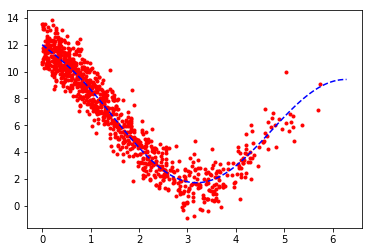

In [ ]:
grid = np.linspace(0, 2*np.pi, 100)

plt.plot(X, Y, 'r.')
plt.plot(grid, r(grid), 'b--')#fonction de regression à estimer


Faire varier, sg, n, et la loi de $X$, à quoi s'attend-on?

In [ ]:
kr0 =KernelReg(Y, X, var_type = 'c' , reg_type = 'll', bw = 0.03*np.ones((1,)))#Poly locaux
kr1 =KernelReg(Y, X, var_type = 'c' , reg_type = 'lc', bw = 3*np.ones((1,)))#NW

In [ ]:
help(KernelReg)

Help on class KernelReg in module statsmodels.nonparametric.kernel_regression:

class KernelReg(statsmodels.nonparametric._kernel_base.GenericKDE)
 |  KernelReg(endog, exog, var_type, reg_type='ll', bw='cv_ls', defaults=<statsmodels.nonparametric._kernel_base.EstimatorSettings object at 0x1a24b62908>)
 |  
 |  Nonparametric kernel regression class.
 |  
 |  Calculates the conditional mean ``E[y|X]`` where ``y = g(X) + e``.
 |  Note that the "local constant" type of regression provided here is also
 |  known as Nadaraya-Watson kernel regression; "local linear" is an extension
 |  of that which suffers less from bias issues at the edge of the support.
 |  
 |  Parameters
 |  ----------
 |  endog: list with one element which is array_like
 |      This is the dependent variable.
 |  exog: list
 |      The training data for the independent variable(s)
 |      Each element in the list is a separate variable
 |  var_type: str
 |      The type of the variables, one character per variable:
 |  

Une première fonction qui code "Nadaraya-Watson" (reg_type = 'lc') et le polynome local d'ordre 1 (regtype = 'll'). 

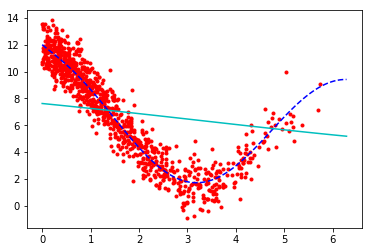

In [ ]:
grid = np.linspace(0, 2*np.pi, 100)
r_est0, dr_est0 = kr0.fit(grid)#objet de deux dimension (1 ere, fonction regression cherché, 2eme, la dérivé)
r_est1, dr_est1 = kr1.fit(grid)#objet de deux dimension (1 ere, fonction regression cherché, 2eme, à voir mais pas la dérivé)
#r_est.__class__
plt.plot(X, Y, 'r.')
plt.plot(grid, r(grid), 'b--')#vrai fonction 
#plt.plot(grid, r_est0, 'g-')#estimé poly locaux odre 1
plt.plot(grid, r_est1, 'c-')#NW

Quid de la dérivée?

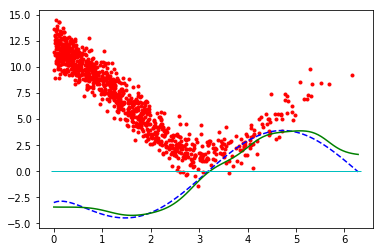

In [ ]:
plt.plot(X, Y, 'r.')#nouage point
plt.plot(grid, dr(grid), 'b--')
plt.plot(grid, dr_est0, 'g-')
plt.plot(grid, dr_est1, 'c_')